## Terra
The main library of qiskit, including methods to construct the quantum circuit.

## Aer
The quantum environment simulator, c.t. backend

## Ignis
Quantum error correction

## Aqua
Includes lots of quantum algorithms and applications, e.g quantum machine learning, quantum chem, quantum opt

In [54]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_state_city, plot_histogram

In [39]:
circuit = QuantumCircuit(2,2) #first parameter means how many circuits, the second means how many classic bits you want to use to represent the qubits

circuit.x(0) #not gate

In [40]:
#hadamard gate
circuit.h(0)
circuit.h(1)

In [41]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circuit)
result = job.result()

In [42]:
state = result.get_statevector(circuit, decimals = 2) #decimals: number of qubits
print(state) #As H gate is imposed, the result is a mixed state

Statevector([ 0.5-0.j, -0.5+0.j,  0.5-0.j, -0.5+0.j],
            dims=(2, 2))


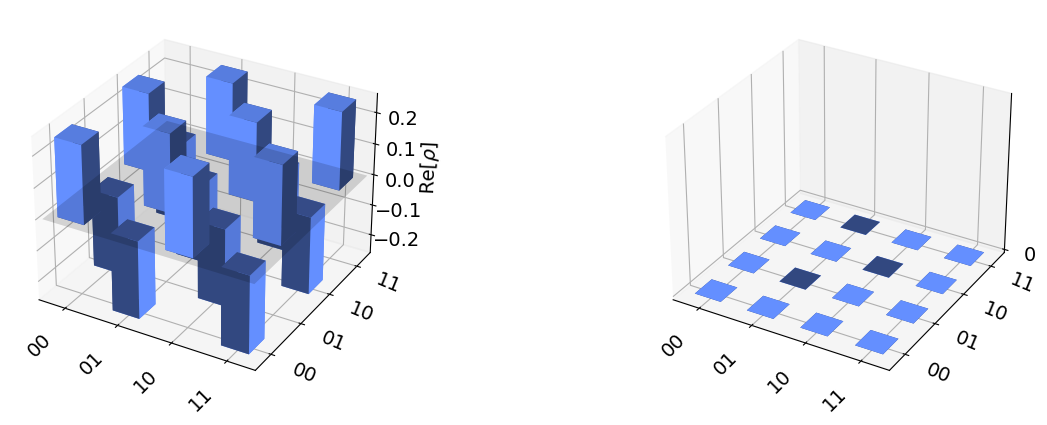

In [43]:
plot_state_city(state)

Create a state of 
$\frac{|000\rangle + |111\rangle}{\sqrt2}$

In [44]:
circuit = QuantumCircuit(3)

circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)

circuit.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2, 2))


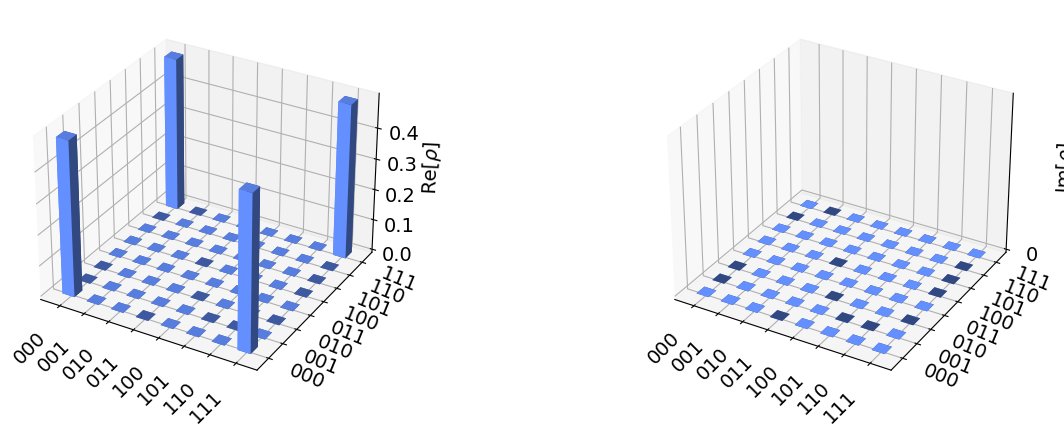

In [45]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circuit)
result = job.result()
state = result.get_statevector(circuit, decimals = 3)
print(state)
plot_state_city(state)

Now lets do some measurement! 

In real quantum computing, we need to do multiple measurements of an experiment and average among the results to get the expectation value

{'000': 490, '111': 534}


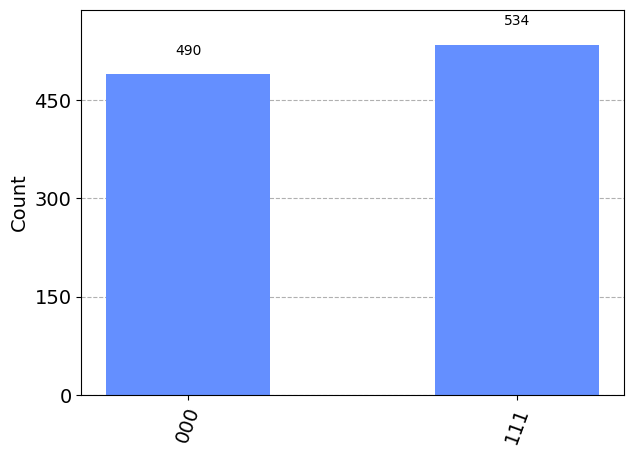

In [63]:
def circuit(nofqubit):
    qc = QuantumCircuit(nofqubit)
    qc.h(0)
    qc.cx(0,1)
    qc.cx(0,2)
    qc.measure_all()

    return qc


circ = circuit(3)
circ.draw()

sim = Aer.get_backend('qasm_simulator')
job = sim.run(circ, shots = 1024) #shots: number of trials
counts = job.result().get_counts(circ)
print(counts)
plot_histogram(counts)
